In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.model_selection import train_test_split



In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


As we can see, the dataset is balanced.

In [3]:
data["target"].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [4]:
data["target"].value_counts(normalize = True)

0.0    0.333333
1.0    0.333333
2.0    0.333333
Name: target, dtype: float64

Let's plot it as well, to visualise its balance.

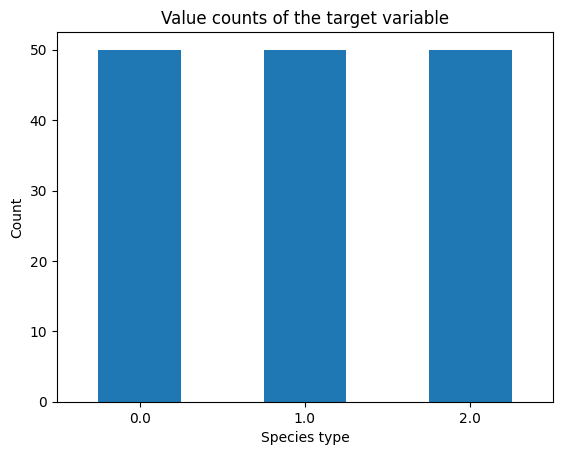

In [5]:
data.target.value_counts().plot(kind = 'bar')
plt.title("Value counts of the target variable")
plt.xlabel("Species type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

For simplicity, lets convert the target to integer:

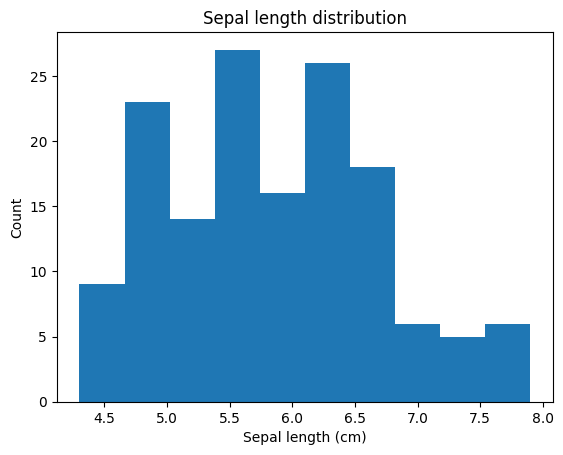

In [6]:
plt.hist(data["sepal length (cm)"])
plt.title("Sepal length distribution")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Count")
plt.show()

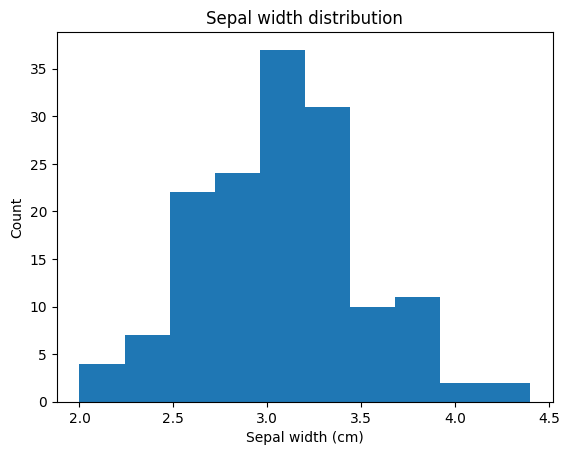

In [7]:
plt.hist(data["sepal width (cm)"])
plt.title("Sepal width distribution")
plt.xlabel("Sepal width (cm)")
plt.ylabel("Count")
plt.show()

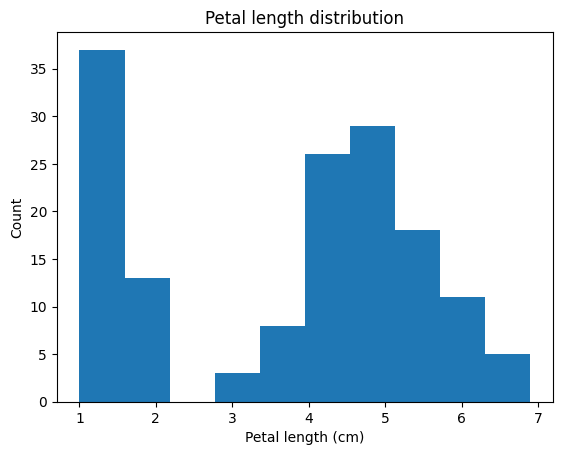

In [8]:
plt.hist(data["petal length (cm)"])
plt.title("Petal length distribution")
plt.xlabel("Petal length (cm)")
plt.ylabel("Count")
plt.show()

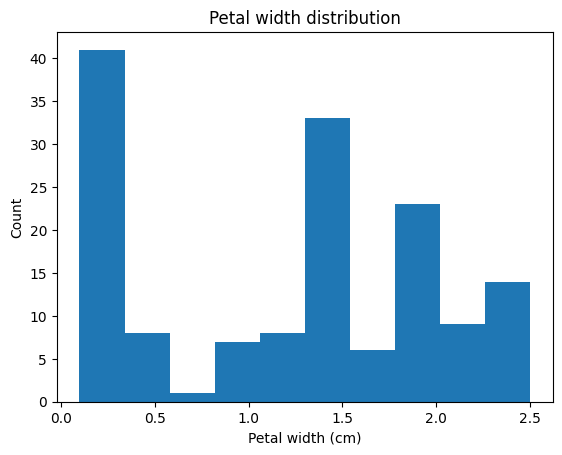

In [9]:
plt.hist(data["petal width (cm)"])
plt.title("Petal width distribution")
plt.xlabel("Petal width (cm)")
plt.ylabel("Count")
plt.show()

In [10]:
data["target"] = [int(target) for target in data["target"]]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Let's split the dataset into features and targets:

In [11]:
X = data.iloc[ : , :3]
y = data.iloc[ : , 4]


In [12]:
X.shape, y.shape

((150, 3), (150,))

In [13]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm)
count,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000
std,0.828066,0.435866,1.765298
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.350000
75%,6.400000,3.300000,5.100000
max,7.900000,4.400000,6.900000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [15]:
X.duplicated().sum()

6

From this, we can infer that there are 6 duplicate rows.

## Classification

First, let's split the dataset into training and testing:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=26)

#### Logistic Regression

In [17]:
from sklearn.linear_model import  LogisticRegression

In [18]:
LRclf = LogisticRegression(random_state = 26).fit(X_train, y_train)

In [19]:
yPredLR = LRclf.predict(X_test)

#### Support Vector Classifier

In [20]:
from sklearn import svm

In [21]:
SVMclf = svm.SVC().fit(X_train, y_train)

In [22]:
yPredSVM = SVMclf.predict(X_test)

#### K-Nearest Neighbours

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
kNNclf = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

In [25]:
yPredkNN = kNNclf.predict(X_test)

Comparing accuracies:

In [26]:
from sklearn.metrics import accuracy_score
print(f'Accuracy Score for Logistic Regression: {accuracy_score(y_test, yPredLR) * 100:0.2f} % ')
print(f'Accuracy Score for Support Vector Classification: {accuracy_score(y_test, yPredSVM) * 100:0.2f} % ')
print(f'Accuracy Score for K-Neighbours Classification: {accuracy_score(y_test, yPredkNN) * 100:0.2f} % ')

Accuracy Score for Logistic Regression: 98.00 % 
Accuracy Score for Support Vector Classification: 96.00 % 
Accuracy Score for K-Neighbours Classification: 96.00 % 


## Hyperparameter Tuning:

In [27]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')



### Logistic Regression

In [28]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

clf = GridSearchCV(LRclf,
                   param_grid = parameters,
                   scoring = 'accuracy',
                   cv = 10)

In [29]:
clf.fit(X_train, y_train);

print("Optimal Hyperparameters:", clf.best_params_)
print("Accuracy with these:", clf.best_score_);

Optimal Hyperparameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy with these: 0.96


Optimal Linear Regression object:

In [30]:
LRclf = LogisticRegression(C = 10, 
                           penalty = 'l2', 
                           solver = 'liblinear')


### Support Vector Classification

In [31]:
parameters = {'C' : [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
              } 

SVMclf = svm.SVC()
clf = GridSearchCV(SVMclf,
                   param_grid = parameters,
                   scoring = 'accuracy',
                   cv = 10)

In [32]:
clf.fit(X_train, y_train);

print("Optimal Hyperparameters:", clf.best_params_)
print("Accuracy with these:", clf.best_score_);

Optimal Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy with these: 0.96


Optimal Support Vector Classifier object:

In [33]:
SVMclf = svm.SVC(C = 10,
                 gamma = 0.1,
                 kernel = 'rbf')

### k-Nearest Neighbours

In [34]:
k_range = list(range(1, 31))
parameters = dict(n_neighbors=k_range)

kNNclf = KNeighborsClassifier()
clf = GridSearchCV(kNNclf,
                   param_grid = parameters,
                   scoring = 'accuracy',
                   cv = 10)

In [35]:
clf.fit(X_train, y_train);

print("Optimal Hyperparameters:", clf.best_params_)
print("Accuracy with these:", clf.best_score_)

Optimal Hyperparameters: {'n_neighbors': 20}
Accuracy with these: 0.96


Optimal kNN Classifier object:

In [36]:
kNNclf = KNeighborsClassifier(n_neighbors=20)